<a href="https://colab.research.google.com/github/MinhDucBee1209/Bai-Tap-AI/blob/main/AI_W4_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=52bd68b1514586bc5603ccf9bee1cae68a870176cb4d63915bee81cf1a47edaa
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


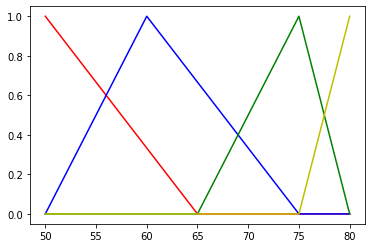

In [33]:
import numpy as np 
import skfuzzy as fuzz 
import matplotlib.pyplot as plt
x = np.arange(50,81,1)
# 3 gia tri cua tam giac tren truc x 
slow = fuzz.trimf(x,[50,50,65])
medium = fuzz.trimf(x,[50,60,75])
medium_fast = fuzz.trimf(x,[65,75,80])
high = fuzz.trimf(x,[75,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5, label='Slow')
plt.plot(x,medium,'b',linewidth = 1.5, label='Medium')
plt.plot(x,medium_fast,'g',linewidth = 1.5, label='Medium_fast')
plt.plot(x,high,'y',linewidth = 1.5, label='High')

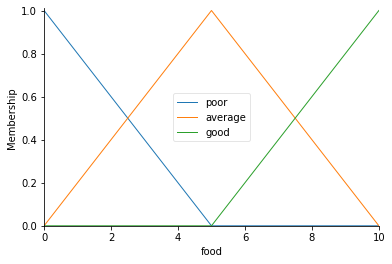

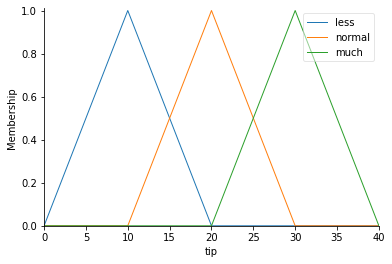

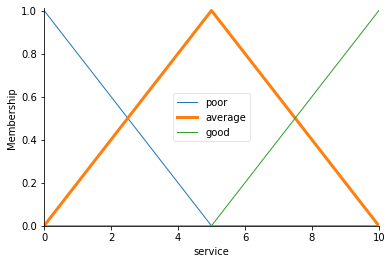

In [34]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctal

food = ctal.Antecedent(np.arange(0,11,1),'food')
service = ctal.Antecedent(np.arange(0,11,1),'service')
tip = ctal.Consequent(np.arange(0,41,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[0,10,20])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,40])

food.view()

tip.view()
service['average'].view()



27.586206896551715


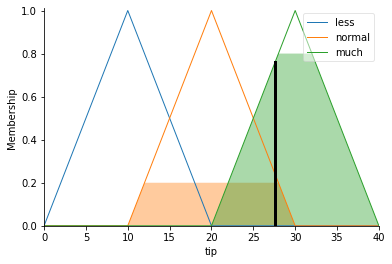

In [35]:
# tao luat
rule1 = ctal.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctal.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctal.Rule(food['poor'] & service['good'], tip['normal'])

rule4 = ctal.Rule(food['average'] & service['poor'], tip['less'])
rule5 = ctal.Rule(food['average'] & service['average'], tip['normal'])
rule6 = ctal.Rule(food['average'] & service['good'], tip['much'])

rule7 = ctal.Rule(food['good'] & service['poor'], tip['normal'])
rule8 = ctal.Rule(food['good'] & service['average'], tip['much'])
rule9 = ctal.Rule(food['good'] & service['good'], tip['much'])

#----------------------------------------------------------------------
tipping_ctal = ctal.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctal.ControlSystemSimulation(tipping_ctal)
tipping.input['food'] = 4
tipping.input['service'] = 10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)


BAI TAP COOK

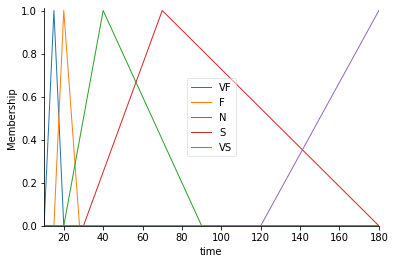

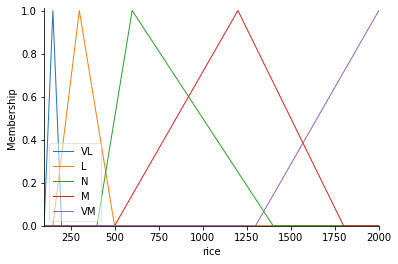

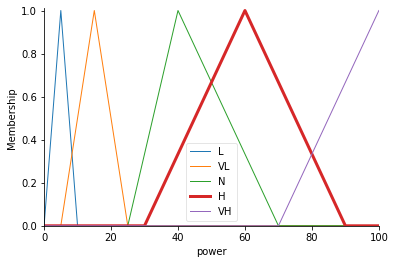

In [36]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctal

time = ctal.Antecedent(np.arange(10,181,1),'time')
rice = ctal.Antecedent(np.arange(100,2001,1),'rice')
power = ctal.Consequent(np.arange(0,101,1),'power')

time['VF'] = fuzz.trimf(time.universe,[10,15,20])
time['F'] = fuzz.trimf(time.universe,[15,20,28])
time['N'] = fuzz.trimf(time.universe,[20,40,90])
time['S'] = fuzz.trimf(time.universe,[30,70,180])
time['VS'] = fuzz.trimf(time.universe,[120,180,180])

rice['VL'] = fuzz.trimf(rice.universe,[100,150,200])
rice['L'] = fuzz.trimf(rice.universe,[150,300,500])
rice['N'] = fuzz.trimf(rice.universe,[400,600,1400])
rice['M'] = fuzz.trimf(rice.universe,[500,1200,1800])
rice['VM'] = fuzz.trimf(rice.universe,[1300,2000,2000])

power['L'] = fuzz.trimf(power.universe,[0,5,10])
power['VL'] = fuzz.trimf(power.universe,[5,15,25])
power['N'] = fuzz.trimf(power.universe,[25,40,70])
power['H'] = fuzz.trimf(power.universe,[30,60,90])
power['VH'] = fuzz.trimf(power.universe,[70,100,100])

time.view()
rice.view()
power['H'].view()


89.36507936507944


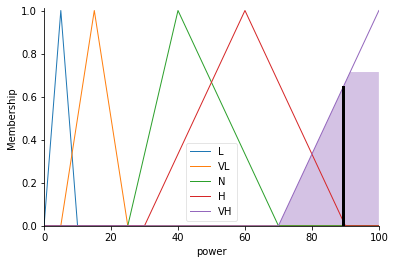

In [37]:
# tao luat
rule_1 = ctal.Rule(time['VF'] & rice['VL'], power['N'])
rule_2 = ctal.Rule(time['VF'] & rice['L'], power['H'])
rule_3 = ctal.Rule(time['VF'] & rice['N'], power['H'])
rule_4 = ctal.Rule(time['VF'] & rice['M'], power['VH'])
rule_5 = ctal.Rule(time['VF'] & rice['VM'], power['VH'])

rule_6 = ctal.Rule(time['F'] & rice['VL'], power['N'])
rule_7 = ctal.Rule(time['F'] & rice['L'], power['N'])
rule_8 = ctal.Rule(time['F'] & rice['N'], power['H'])
rule_9 = ctal.Rule(time['F'] & rice['M'], power['H'])
rule_10 = ctal.Rule(time['F'] & rice['VM'], power['VH'])

rule_11 = ctal.Rule(time['N'] & rice['VL'], power['L'])
rule_12 = ctal.Rule(time['N'] & rice['L'], power['N'])
rule_13 = ctal.Rule(time['N'] & rice['N'], power['N'])
rule_14 = ctal.Rule(time['N'] & rice['M'], power['H'])
rule_15 = ctal.Rule(time['N'] & rice['VM'], power['H'])

rule_16 = ctal.Rule(time['S'] & rice['VL'], power['L'])
rule_17 = ctal.Rule(time['S'] & rice['L'], power['L'])
rule_18 = ctal.Rule(time['S'] & rice['N'], power['N'])
rule_19 = ctal.Rule(time['S'] & rice['M'], power['N'])
rule_20 = ctal.Rule(time['S'] & rice['VM'], power['H'])

rule_21 = ctal.Rule(time['VS'] & rice['VL'], power['VL'])
rule_22 = ctal.Rule(time['VS'] & rice['L'], power['L'])
rule_23 = ctal.Rule(time['VS'] & rice['N'], power['L'])
rule_24 = ctal.Rule(time['VS'] & rice['M'], power['N'])
rule_25 = ctal.Rule(time['VS'] & rice['VM'], power['N'])

#----------------------------------------------------------------------
powerping_ctal = ctal.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,rule_21,rule_22,rule_23,rule_24,rule_25])
powerping = ctal.ControlSystemSimulation(powerping_ctal)
powerping.input['time'] = 20
powerping.input['rice'] =1800
powerping.compute()
print(powerping.output['power'])
power.view(sim = powerping)